In [1]:
import matplotlib as mpl
import matplotlib.image as mpim
import matplotlib.patches as mp
import matplotlib.pyplot as pp
import matplotlib.ticker as mt
import numpy as np

mpl.rcParams["text.latex.preamble"] = r"\usepackage{siunitx}"

%matplotlib inline

In [2]:
img = mpim.imread("../presentation/figures/objects-dvs.png")

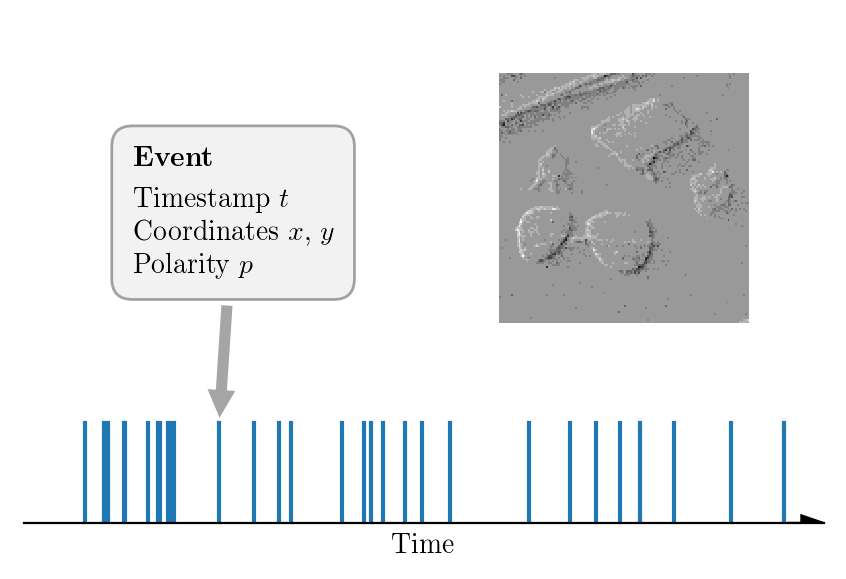

In [3]:
fig = pp.figure(figsize=(4, 2.5), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
imgax = fig.add_axes([0.5, 0.4, 0.5, 0.5])

# ts = np.random.uniform(0, 1, 30)
# ts = np.sort(ts)
ts = np.array([ 0.03515082,  0.06107953,  0.06633589,  0.08878118,  0.08902636,
                0.12114729,  0.13559836,  0.13786429,  0.14802155,  0.1517718 ,
                0.15718345,  0.219064  ,  0.26719973,  0.30179631,  0.31720906,
                0.38785991,  0.41827016,  0.42804611,  0.44486524,  0.47474463,
                0.49816352,  0.53683796,  0.64471602,  0.70141825,  0.73742719,
                0.76958845,  0.7975515 ,  0.84392715,  0.92230543,  0.99601649])

for t in ts:
    ax.axvline(t, 0, 0.2)

# Event explanation
ax.annotate(r"\noindent\textbf{Event}\vspace{0.04in}\\Timestamp $t$\\Coordinates $x$, $y$\\Polarity $p$",
            xytext=(0.1, 0.5), xy=(ts[11], 0.2),
            arrowprops=dict(arrowstyle="simple", ec="none", fc="0.3", alpha=0.5, mutation_scale=20),
            bbox=dict(boxstyle="round,pad=0.75", lw=1, ec="0.3", fc=".9", alpha=0.5))

# DVS image
imgax.set_axis_off()
imgax.imshow(img)

# Arrow on time axis
ax.set_xlim(-0.05, 1.05)
ax.set_xlabel("Time")
ax.arrow(1, 0, 0.05, 0,
         width=0, head_length=0.03, head_width=0.03, length_includes_head=True,
         shape="full", fc="k")

# Hide ticks, tick labels and all axes except x (time)
ax.set_yticks([])
ax.set_xticks([])
for s in ["left", "right", "top"]:
    ax.spines[s].set_visible(False)

In [4]:
fig.savefig("../presentation/figures/event-stream.pdf", bbox_inches="tight")

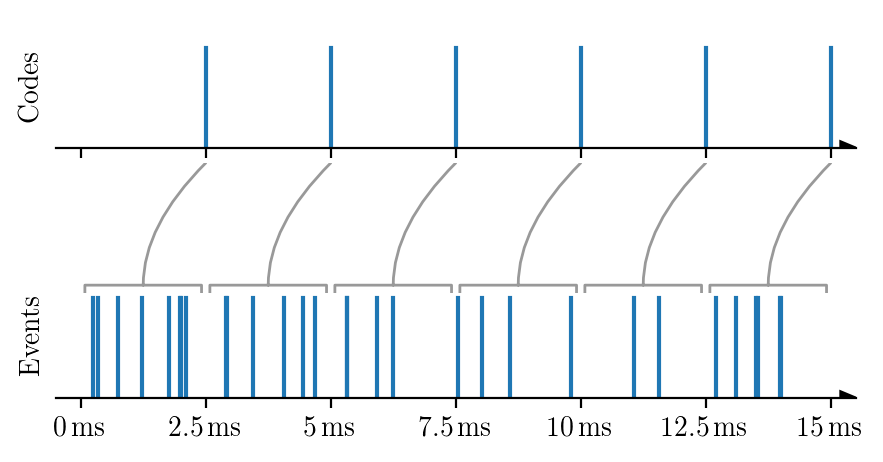

In [5]:
fig = pp.figure(figsize=(4, 2.5), dpi=200)
axev = fig.add_axes([0, 0, 1, 0.25])
axrp = fig.add_axes([0, 0.5, 1, 0.25])
axlines = fig.add_axes([0, 0.21, 1, 0.26])

# ts = np.random.uniform(0, 15, 30)
# ts = np.sort(ts)
ts = np.array([  0.24363653,   0.33620965,   0.75378595,   1.22423184,
                 1.76128639,   1.98670007,   2.01307608,   2.10899899,
                 2.91575711,   2.93377587,   3.4523145 ,   4.0671688 ,
                 4.44720576,   4.68756608,   5.32472097,   5.33306332,
                 5.92160613,   6.24422517,   7.55045842,   8.02991757,
                 8.57702575,   9.81528206,  11.07083586,  11.56642201,
                12.70594648,  13.10136854,  13.5143778 ,  13.55074643,
                13.98657849,  14.00569294])

for t in ts:
    axev.axvline(t, 0, 0.8)
    
for t in np.arange(2.5, 15.1, 2.5):
    axrp.axvline(t, 0, 0.8)
    
axev.xaxis.set_major_formatter(mt.StrMethodFormatter(r"\SI{{{x:g}}}{{\milli\second}}"))
axrp.set_xticklabels([])
axev.set_ylabel("Events")
axrp.set_ylabel("Codes")

for ax in [axev, axrp]:
    ax.set_xlim(-0.5, 15.5)
    ax.arrow(15.2, 0, 0.3, 0,
             width=0, head_length=0.3, head_width=0.1, length_includes_head=True,
             shape="full", fc="k")
    
    # Hide ticks, tick labels and all axes except x (time)
    ax.set_yticks([])
    ax.set_xticks(np.arange(0, 15.1, 2.5))
    for s in ["left", "right", "top"]:
        ax.spines[s].set_visible(False)

# Trick to draw lines outside of axes
axlines.set_xlim(-0.5, 15.5)
axlines.set_ylim(0, 1)
axlines.xaxis.set_visible(False)
axlines.yaxis.set_visible(False)
for s in ["left", "right", "top", "bottom"]:
        axlines.spines[s].set_visible(False)
for t in np.arange(2.5, 15.1, 2.5):
    arrow = mp.FancyArrowPatch(posA=(t, 1), posB=(t - 1.25, 0.06),
                               arrowstyle="-[,widthB=2.1,lengthB=5.5", ec="0.6",
                               connectionstyle="angle3,angleA=45,angleB=90",
                               shrinkA=0, shrinkB=0, mutation_scale=10)
    
    axlines.add_patch(arrow)

In [6]:
fig.savefig("../presentation/figures/autoencoder.pdf", bbox_inches="tight")